## 2.0 Exploratory Data Analysis ##

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [83]:
career = pd.read_csv('ir_career.csv')

So far,  we've been able to create a representation of each player's career as a vector of Injuries (or Status of 'Healthy') where each item in the vector corresponds to the season number of their career.  Season Numbers provide us a convenient way to measure the veteranness of a player. Our assumption is that as a player accummulates more seasons, they more than likely will have a higher probability of incurring an IR injury. The higher the probability for injury, the less likely we'll be to draft them in the early rounds and wait for the risk/reward to be more palatable.

Before we delve into player details, let's see if we can glean some insights on overall probabilities for specific injuries by season_number.  this will be aggregated over all 700+ players.  This will tell us which injuries are likely to occur early on in a player's career and which may occur later (we'll separate out by position to see if that has any importance)


### 2.1 Put Some Heat on That

In [84]:
# Let's get some quick summary statistics on how many players we have for each position:

career.position.value_counts()

WR    285
RB    207
TE    131
QB    103
Name: position, dtype: int64

In [88]:
# This makes sense - WRs and RBs are a deeper position compared to QB and TE. Let's see what the career length distributions are by position. 
# First, let's split the career df into the 4 positions.

rb = career[career['position']=='RB']
wr = career[career['position']=='WR']
qb = career[career['position']=='QB']
te = career[career['position']=='TE']

# make a list of dfs for easy iteration
dict_df = {'rb':rb,
           'wr': wr,
           'qb':qb,
           'te': te}

In [91]:
def getTotalCareerSeasons(df):
    
    df_long = df.melt(id_vars='player',
                  value_vars=[str(x) for x in range(1,10)])
    df_long.dropna(inplace=True)
    df_long  = df_long.groupby('player')['variable'].agg('count')
    obj =  df_long.value_counts().sort_index().to_dict()
    return obj


pos_seasons = {}
for position in dict_df.keys():
    counts  = getTotalCareerSeasons(dict_df[position])
    pos_seasons[position] = counts
    # pos_seasons.append(counts)


In [102]:
pd.DataFrame(pos_seasons).T

,1,2,3,4,5,6,7,8,9
rb,22.0,26.0,32.0,27.0,31.0,25.0,19.0,24.0,1.0
wr,36.0,42.0,40.0,45.0,37.0,30.0,28.0,24.0,3.0
qb,10.0,16.0,13.0,17.0,14.0,13.0,7.0,13.0,NaN
te,13.0,14.0,22.0,20.0,18.0,11.0,17.0,14.0,2.0


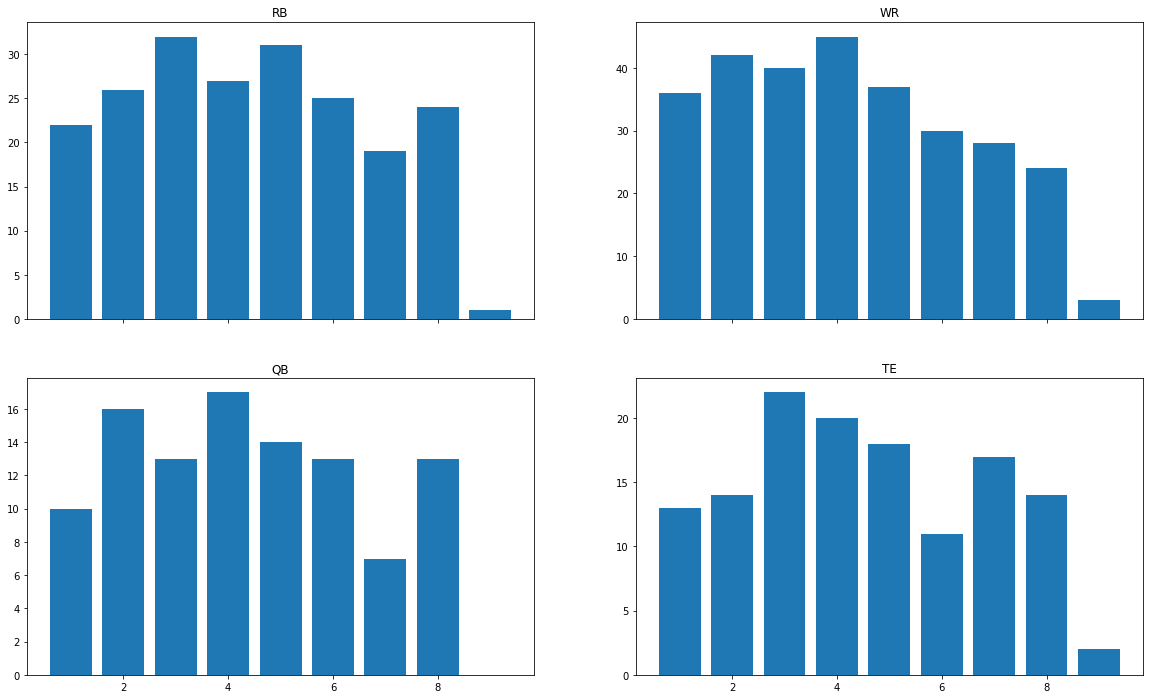

In [143]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=False, figsize=(20,12))

axes = axes.flatten()
for idx, position in enumerate(pos_seasons):
    values = pos_seasons[position].values()
    x = pos_seasons[position].keys()
    axes[idx].bar(x,values)
    axes[idx].set_title(position.upper())
plt.show()

Either based on the table or the 

In [72]:
df_long = rb.melt(id_vars='player',
                  value_vars=[str(x) for x in range(1,10)])
df_long.dropna(inplace=True)
df_long  = df_long.groupby('player')['variable'].agg('count')
df_long.value_counts().to_dict()

AttributeError: 'dict' object has no attribute 'sort_keys'

{8: 47, 5: 28, 3: 25, 7: 23, 4: 23, 6: 22, 1: 21, 2: 17, 9: 1}